<a href="https://colab.research.google.com/github/JS-DS-coder/MITMachineLearning/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3
**Neural Network Basics**

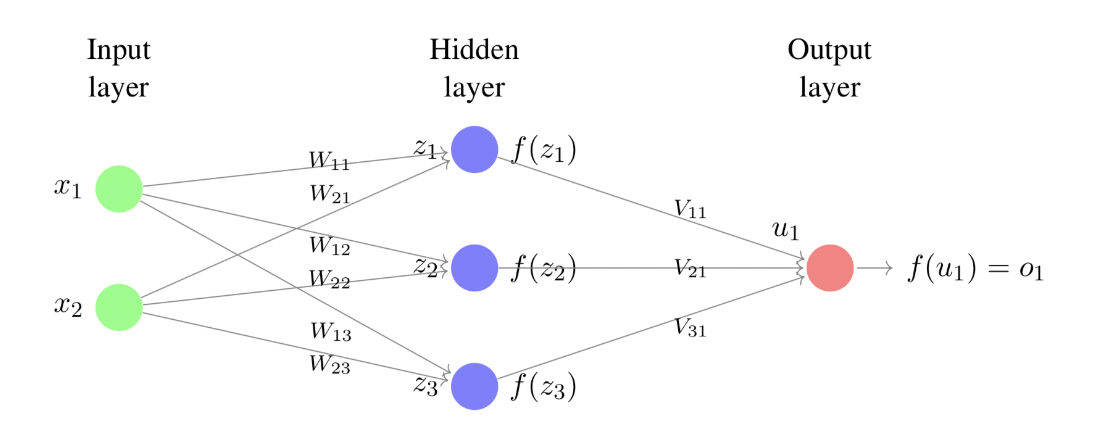

In [2]:
import numpy as np

In [3]:
def rectified_linear_unit(x):
    """ Returns the ReLU of x, or the maximum between 0 and x."""
    # TODO
    return np.maximum(0.0,x)

In [4]:
def rectified_linear_unit_derivative(x):
    """ Returns the derivative of ReLU."""
    # TODO
    dx = (x > 0) * 1
    return dx

In [12]:

def output_layer_activation(x):
    """ Linear function, returns input as is. """
    return x

def output_layer_activation_derivative(x):
    """ Returns the derivative of a linear function: 1. """
    return 1

class NeuralNetwork():
    """
        Contains the following functions:
            -train: tunes parameters of the neural network based on error obtained from forward propagation.
            -predict: predicts the label of a feature vector based on the class's parameters.
            -train_neural_network: trains a neural network over all the data points for the specified number of epochs during initialization of the class.
            -test_neural_network: uses the parameters specified at the time in order to test that the neural network classifies the points given in testing_points within a margin of error.
    """

    def __init__(self):

        # DO NOT CHANGE PARAMETERS (Initialized to floats instead of ints)
        self.input_to_hidden_weights = np.matrix('1. 1.; 1. 1.; 1. 1.')
        self.hidden_to_output_weights = np.matrix('1. 1. 1.')
        self.biases = np.matrix('0.; 0.; 0.')
        self.learning_rate = .001
        self.epochs_to_train = 10
        self.training_points = [((2,1), 10), ((3,3), 21), ((4,5), 32), ((6, 6), 42)]
        self.testing_points = [(1,1), (2,2), (3,3), (5,5), (10,10)]

    def train(self, x1, x2, y):

        ### Forward propagation ###
        #input_values = np.matrix([[x1],[x2]]) # 2 by 1
        input_values = np.expand_dims(np.array([x1, x2]), 1) 
        W1= self.input_to_hidden_weights
        b = self.biases
       # Calculate the input and activation of the hidden layer
        hidden_layer_weighted_input = (W1 @ input_values) + b
        hidden_layer_activation = rectified_linear_unit(hidden_layer_weighted_input)# TODO (3 by 1 matrix)
        
        W2 = self.hidden_to_output_weights
        output =  W2 @ hidden_layer_activation
        activated_output = output_layer_activation(output)

        delta_2 = (y - activated_output)*output_layer_activation_derivative(activated_output)
        delta_1 = delta_2 @ W2 @ rectified_linear_unit_derivative(hidden_layer_weighted_input)
        
        hidden_to_output_weight_gradients = delta_2 @ hidden_layer_activation.T
        input_to_hidden_weight_gradients = delta_1 @ input_values.T

        bias_gradients = delta_1
        
        # Use gradients to adjust weights and biases using gradient descent
        self.biases += self.learning_rate*bias_gradients
        self.input_to_hidden_weights +=     self.learning_rate*input_to_hidden_weight_gradients
        self.hidden_to_output_weights +=    self.learning_rate*hidden_to_output_weight_gradients

        ### Backpropagation ###

    def predict(self, x1, x2):
        input_values = np.expand_dims(np.array([x1, x2]), 1) 
        hidden_layer_weighted_input = self.input_to_hidden_weights @ input_values + self.biases
        hidden_layer_activation = rectified_linear_unit(hidden_layer_weighted_input)
        output = self.hidden_to_output_weights @ hidden_layer_activation
        activated_output = output_layer_activation(output)
        return activated_output.item()
     
   ## def predict(self, x1, x2):

   ##     input_values = np.matrix([[x1],[x2]])

        # Compute output for a single input(should be same as the forward propagation in training)
   ##     hidden_layer_weighted_input = # TODO
   ##     hidden_layer_activation = # TODO
   ##     output = # TODO
   ##     activated_output = # TODO

   ##     return activated_output.item()

    # Run this to train your neural network once you complete the train method
    def train_neural_network(self):

        for epoch in range(self.epochs_to_train):
            for x,y in self.training_points:
                self.train(x[0], x[1], y)

    # Run this to test your neural network implementation for correctness after it is trained
    def test_neural_network(self):

        for point in self.testing_points:
            print("Point,", point, "Prediction,", self.predict(point[0], point[1]))
            if abs(self.predict(point[0], point[1]) - 7*point[0]) < 0.1:
                print("Test Passed")
            else:
                print("Point ", point[0], point[1], " failed to be predicted correctly.")
                return

x = NeuralNetwork()

x.train_neural_network()
x.test_neural_network()


Point, (1, 1) Prediction, 7.035647383790542
Test Passed
Point, (2, 2) Prediction, 14.009568916104943
Test Passed
Point, (3, 3) Prediction, 20.983490448419342
Test Passed
Point, (5, 5) Prediction, 34.931333513048145
Test Passed
Point, (10, 10) Prediction, 69.80094117462015
Point  10 10  failed to be predicted correctly.
